In [1]:
import numpy as np
import torchvision
import torchvision.transforms as transforms
from core import SymmetryFinder, SymmetryFinderLabel
import matplotlib.pyplot as plt
import seaborn as sns
DATA_PATH = 'weak_dataset.npy'

In [2]:

def imshow(img, dim):
    img = img.reshape(dim) * 255
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
import torchvision.transforms.functional as funct
dim = (28, 28)

transform = transforms.Compose(
    [
    lambda x: funct.rotate(x, angle=-90),
    funct.hflip,
    # transforms.RandomHorizontalFlip(),
    # transforms.Resize(dim),
    transforms.ToTensor(),
     lambda x: x.view(-1),
     lambda x: x.numpy()])

trainset = torchvision.datasets.EMNIST(root='./data', train=True,
                                        download=True, transform=transform,
                                        split="digits",
                                      )
# testset = torchvision.datasets.EMNIST(root='./data', train=False,
#                                        download=True, transform=transform, split="digits")

# idx = (trainset.targets == 4)
# trainset.targets = trainset.targets[idx]
# trainset.data = trainset.data[idx]
data2 = np.array([x for i, (x, label) in enumerate(trainset)])
labels = np.array([label for i, (x, label) in enumerate(trainset)])

In [4]:
cov = np.cov(data2, rowvar=False)
eigen = np.linalg.eig(cov)
cov_eigenvalues = np.real(eigen[0])
eigenvectors = np.real(eigen[1])
mu = np.mean(data2, axis=0)
sol = np.linalg.solve(eigenvectors, mu)
num_trivial_vectors = np.sum((sol < SymmetryFinder.ignore_threshold) & \
                             (cov_eigenvalues < SymmetryFinder.ignore_threshold))
swaps = int((dim[0] * dim[1] - num_trivial_vectors) // 2)
# symm = SymmetryFinder(alpha=0.05, fit_method='median', select_method='mean_rotate_bs')
# symm = SymmetryFinder(fit_method='sign', select_method=50, scoring_sig=25, cov_adj_score=True, la=0.003, tv_ratio=1)
symm = SymmetryFinderLabel()
symm.fit(data2, labels)

12.045202653018324 0.00010762763015018078
2.109953072967775 0.0001002773660545005
0.7213758823575099 1.9763582920964848e-05
0.3519753143762195 2.093638207802806e-05
0.27572079629860197 9.566216777313597e-05
0.22624159620106787 9.00900758096229e-05
0.17385656245261577 2.575158702961024e-05
0.14726915911863017 4.4656899802176515e-05
0.10902423241564903 6.131901855015542e-05
0.08743358972157653 2.6141670432093223e-05
0.07251445961085824 4.528040239316386e-06
0.06436209894112702 8.383511152811843e-05
0.05778322247849111 2.1127283341287644e-05
0.03761340567349438 7.609021383645431e-06
0.03213390507598498 1.663634335370283e-05
0.026518396394546912 8.708470680143424e-06
0.023762310933398697 5.863365469868985e-06
0.02055355870833475 3.457228923528292e-05
0.019043312882436905 2.4105949172671944e-06
0.01805561315520108 5.667627254074475e-06
0.015990051915177064 1.018008722531162e-05
0.012721720060561693 1.3227001760551597e-06
0.00971453247856734 1.0003472293634066e-05
0.008010448205443159 6.6421

SymmetryFinderLabel()

In [5]:
sum(symm.trans_eigenvalues_ == -1)

0

In [6]:
# mmd_errors = np.array(symm.mmd_errors_)
# sns.lineplot(range(1, len(mmd_errors)+1), np.log(-mmd_errors))
# plt.xlabel("Number of swaps")
# plt.ylabel(f"Log Spherical MMD ($\sigma^2 = {symm.scoring_sig}$)")

# plt.savefig("0_spherical_errors")

In [7]:
symm.trans_eigenvalues_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

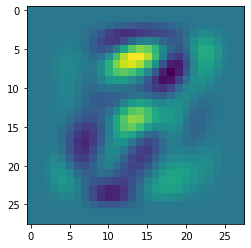

In [8]:
plt.imshow(symm.eigenvectors_[:, -12].reshape(dim))


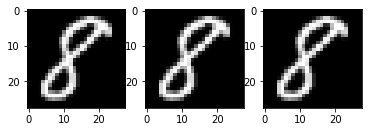

In [9]:
# symm.select_method = 38
orig_img = data2[14]
fig, ax = plt.subplots(1,3)
img1 = orig_img.reshape(dim) * 255
ax[0].imshow(img1, cmap='gray')
img2 = (np.clip(orig_img @ symm.trans_, 0, 1)).reshape(dim) * 255
ax[1].imshow(img2, cmap='gray')
img2 = (orig_img @ symm.trans_).reshape(dim) * 255
ax[2].imshow(img2, cmap='gray')

plt.show()
# plt.savefig("6s")

In [10]:
# symm2 = SymmetryFinder(fit_method='sign', select_method='mmd', scoring_sig=5, cov_adj_score=True, la=0.03, tv_ratio=0.75)
# symm2.fit(data2)
#

In [11]:
# sum(symm2.trans_eigenvalues_ == -1), sum(symm2.trans_eigenvalues_ == 1)
#

In [12]:
# mmd_errors2 = np.array(symm2.mmd_errors_)
# sns.lineplot(range(1, len(mmd_errors2)+1), np.log(-mmd_errors2))
# plt.xlabel("Number of swaps")
# plt.ylabel(f"Log Spherical MMD ($\sigma^2 = {symm2.scoring_sig}$)")
# # plt.savefig("0_spherical_errors")

In [13]:
# symm = SymmetryFinder(fit_method='sign', select_method='mmd', scoring_sig=5, cov_adj_score=True, la=0.03)
# symm.fit(data2, cov=cov)

In [14]:
# mmd_errors = np.array(symm.mmd_errors_)
# sns.lineplot(range(1, len(mmd_errors)+1), np.log(-mmd_errors))
# plt.xlabel("Number of swaps")
# plt.ylabel("Log Data-Based MMD")
# plt.savefig("0_data_errors")

In [15]:
# rows = 12
# models = [0, 13, 23, 45, 65, 89]
# fig, ax = plt.subplots(len(models), rows, figsize=(10, 5))
#
# fig.subplots_adjust(hspace=0, wspace=0)
# for j in range(rows):
#     orig_img = data2[5 * j]
#     for i, model_size in enumerate(models):
#         symm.select_method = model_size
#         img = (orig_img @ symm.trans_).reshape(dim) * 255
#         ax[i, j].imshow(img, cmap='gray')
#         ax[i, j].axis('off')
#
# plt.show()
# fig.savefig("0s")
#

In [16]:
# rows = 12
# models = [0, 5, 10, 15, 20, 40, 60, 80]
# fig, ax = plt.subplots(len(models), rows, figsize=(7.5, 5))
#
# fig.subplots_adjust(hspace=0, wspace=0)
# for j in range(rows):
#     orig_img = data2[4 * j]
#     for i, model_size in enumerate(models):
#         symm.select_method = model_size
#         img = (orig_img @ symm.trans_).reshape(dim) * 255
#         ax[i, j].imshow(img, cmap='gray')
#         ax[i, j].axis('off')
#
# # plt.show()
# plt.savefig("alls")

In [17]:
# symm.select_method = 20

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import time
import numpy as np
from torch.utils.data.dataset import random_split

class RandomLinearTransform:
    def __init__(self, trans, p=0.5):
        self.p = torch.tensor([p])
        self.trans = trans

    def __call__(self, x):
        if torch.bernoulli(self.p):
            return torch.clip(self.trans(x), 0, 1)
        else:
            return x

symm.trans_ = torch.tensor(symm.trans_, dtype=torch.float)


In [19]:
transform = transforms.Compose(
    [
    # transforms.Resize(dim),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

transform2 = transforms.Compose(
    [
    # transforms.Resize(dim),
    transforms.ToTensor(),
    lambda x: x.view(-1, dim[0]*dim[1]),
    RandomLinearTransform(symm.predict, p=0.5),
     lambda x: x.view(-1, dim[0], dim[1]),
    transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform2)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=512,
#                                          shuffle=False, num_workers=2)
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

torch.manual_seed(42)
trainset, validset = torch.utils.data.random_split(trainset, (2_000, 58_000))
# print(len(random_split(trainset,(10000,50000))[1]))

In [20]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(128*4*4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        # print(x.shape)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


total_time = 0
true_epoch = 0
train_error_list = []
test_error_list = []

In [21]:
import torch.optim as optim
device='cuda:0'
testloader = torch.utils.data.DataLoader(testset, batch_size=512,
                                         shuffle=False)
criterion = nn.CrossEntropyLoss()

In [ ]:
tests = 10
accuracies = []
for i in range(tests):
    net = Net()
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True)
    net = net.to(device)
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
    true_epoch = 0
    for epoch in range(51):  # loop over the dataset multiple times
        start_time = time.time()
        true_epoch += 1
        running_loss = 0.0
        true_train_total = 0.0
        correct_train_total = 0.0
        correct_train = 0.0
        total_train = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            true_train_total += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            correct_train_total += (predicted == labels).sum().item()

            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (true_epoch % 10 == 1) and (i % 50 == 49):    # print every 100 mini-batches
                print(f'[{true_epoch}, {i + 1}] loss: {running_loss / total_train:.4f}, Correct Rate: {100 * correct_train / total_train:.2f}%')
                running_loss = 0.0
                correct_train = 0.0
                total_train = 0.0
        train_error_list.append(100 * correct_train_total / true_train_total)
        correct = 0
        total = 0
        if true_epoch % 10 == 1:
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    images, labels = images.to(device), labels.to(device)
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                test_error_list.append(100 * correct / total)

            print(f'Accuracy at ({true_epoch}) of the network on the 10000 test images: {100 * correct / total}')
            total_time += time.time() - start_time
            print(f'Finished epoch {true_epoch}, cumulative time: {total_time}s')
    accuracies.append(100 * correct / total)
print(f"Accuracy = {np.mean(accuracies)} +/- {np.std(accuracies)/np.sqrt(tests)}")
print("Finished training!")

[1, 50] loss: 0.0690, Correct Rate: 36.25%
Accuracy at (1) of the network on the 10000 test images: 58.26
Finished epoch 1, cumulative time: 3.2702255249023438s
[11, 50] loss: 0.0041, Correct Rate: 96.06%
Accuracy at (11) of the network on the 10000 test images: 94.05
Finished epoch 11, cumulative time: 5.7504050731658936s
[21, 50] loss: 0.0010, Correct Rate: 99.38%
Accuracy at (21) of the network on the 10000 test images: 96.37
Finished epoch 21, cumulative time: 8.255117893218994s
[31, 50] loss: 0.0004, Correct Rate: 100.00%
Accuracy at (31) of the network on the 10000 test images: 96.71
Finished epoch 31, cumulative time: 10.943971633911133s
[41, 50] loss: 0.0002, Correct Rate: 100.00%
Accuracy at (41) of the network on the 10000 test images: 96.7
Finished epoch 41, cumulative time: 13.574464559555054s


In [ ]:
accuracies_2 = [96.8, 96.57, 96.79, 96.72, 96.76, 96.52, 96.57, 96.7, 96.89, 96.91]
print(f"Accuracy = {np.mean(accuracies_2)} +/- {np.std(accuracies_2)/np.sqrt(tests)}")

In [ ]:
accuracies

In [ ]:
print(net.conv1.weight.device)

In [ ]:

net = Net()
total_time = 0
true_epoch = 0
train_error_list = []
test_error_list = []

trainset2 = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform2)

torch.manual_seed(42)
trainset2, validset2 = torch.utils.data.random_split(trainset2, (2_000, 58_000))

trainloader = torch.utils.data.DataLoader(trainset2, batch_size=32,
                                          shuffle=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
net.to(device)


In [ ]:

for epoch in range(100):  # loop over the dataset multiple times
    start_time = time.time()
    true_epoch += 1
    running_loss = 0.0
    true_train_total = 0.0
    correct_train_total = 0.0
    correct_train = 0.0
    total_train = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        true_train_total += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        correct_train_total += (predicted == labels).sum().item()

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 100 mini-batches
            print(f'[{true_epoch}, {i + 1}] loss: {running_loss / total_train:.4f}, Correct Rate: {100 * correct_train / total_train:.2f}%')
            running_loss = 0.0
            correct_train = 0.0
            total_train = 0.0
    train_error_list.append(100 * correct_train_total / true_train_total)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_error_list.append(100 * correct / total)

    total_time += time.time() - start_time
    print(f'Accuracy at ({true_epoch}) of the network on the 10000 test images: {100 * correct / total}')
    print(f'Finished epoch {true_epoch}, cumulative time: {total_time}s')
print("Finished training!")